## ANALYSIS

In [97]:
%load_ext autoreload
%autoreload 2
from common import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
RESULT_JSON = "/Users/law/repos/viper/results/ycsb/ycsb_all.json"

In [105]:
import json

results_raw = json.loads(open(RESULT_JSON).read())
assert results_raw["context"]["library_build_type"] != "debug"
BENCHMARKS =  results_raw["benchmarks"]
# print(BENCHMARKS)

In [106]:
from collections import defaultdict
runs = defaultdict(list)

FIXTURES = [VIPER, DRAM_MAP, PMEMKV, HYBRID_FASTER, NVM_FASTER]
BM_TYPES = ['5050_uniform', '1090_uniform', '5050_zipf', '1090_zipf']

RUNS = get_benchmarks(BENCHMARKS)

pprint(RUNS)

defaultdict(<class 'list'>,
            {('DramMap', '1090_uniform'): [{'cpu_time': 59219032.64700001,
                                            'found': 50000000.0,
                                            'hdr_9999': 4064.0,
                                            'hdr_max': 2370559.0,
                                            'hdr_mean': 807.0,
                                            'items_per_second': 842222.7508560168,
                                            'iterations': 1,
                                            'name': 'DramMapFixture<KeyType8,ValueType200>/1090_uniform/iterations:1/repeats:1/real_time/threads:1',
                                            'real_time': 59366717.35497657,
                                            'repetition_index': 0,
                                            'repetitions': 1,
                                            'run_name': 'DramMapFixture<KeyType8,ValueType200>/1090_uniform/iterations:1/repeats:1/real_time/

                                           'threads': 8,
                                           'time_unit': 'us'},
                                          {'cpu_time': 16604773.618249979,
                                           'found': 50000000.0,
                                           'hdr_9999': 86903.0,
                                           'hdr_max': 37257215.0,
                                           'hdr_mean': 1482.0,
                                           'items_per_second': 3001256.0467322473,
                                           'iterations': 16,
                                           'name': 'NvmFasterFixture<KeyType8,ValueType200>/1090_zipf/iterations:1/repeats:1/real_time/threads:16',
                                           'real_time': 1041230.7218514343,
                                           'repetition_index': 0,
                                           'repetitions': 1,
                                           'run_name'

                                                  'real_time': 2209402.375860009,
                                                  'repetition_index': 0,
                                                  'repetitions': 1,
                                                  'run_name': 'PmemHybridFasterFixture<KeyType8,ValueType200>/1090_zipf/iterations:1/repeats:1/real_time/threads:8',
                                                  'run_type': 'iteration',
                                                  'threads': 8,
                                                  'time_unit': 'us'},
                                                 {'cpu_time': 15481136.7975,
                                                  'found': 50000000.0,
                                                  'hdr_9999': 137615.0,
                                                  'hdr_max': 23700479.0,
                                                  'hdr_mean': 703.0,
                                         

                                          {'cpu_time': 29705645.41471875,
                                           'found': 50000000.0,
                                           'hdr_9999': 120315.0,
                                           'hdr_max': 24417279.0,
                                           'hdr_mean': 16360.0,
                                           'items_per_second': 1679137.5002735795,
                                           'iterations': 32,
                                           'name': 'PmemKVFixture<KeyType8,ValueType200>/5050_uniform/iterations:1/repeats:1/real_time/threads:32',
                                           'real_time': 930537.2548379296,
                                           'repetition_index': 0,
                                           'repetitions': 1,
                                           'run_name': 'PmemKVFixture<KeyType8,ValueType200>/5050_uniform/iterations:1/repeats:1/real_time/threads:32',
                     

                                       'items_per_second': 3065346.89914643,
                                       'iterations': 4,
                                       'name': 'ViperFixture<KeyType8,ValueType200>/5050_zipf/iterations:1/repeats:1/real_time/threads:4',
                                       'real_time': 4077841.8923746357,
                                       'repetition_index': 0,
                                       'repetitions': 1,
                                       'run_name': 'ViperFixture<KeyType8,ValueType200>/5050_zipf/iterations:1/repeats:1/real_time/threads:4',
                                       'run_type': 'iteration',
                                       'threads': 4,
                                       'time_unit': 'us'},
                                      {'cpu_time': 9011786.680499999,
                                       'found': 50000000.0,
                                       'hdr_9999': 16945.0,
                            

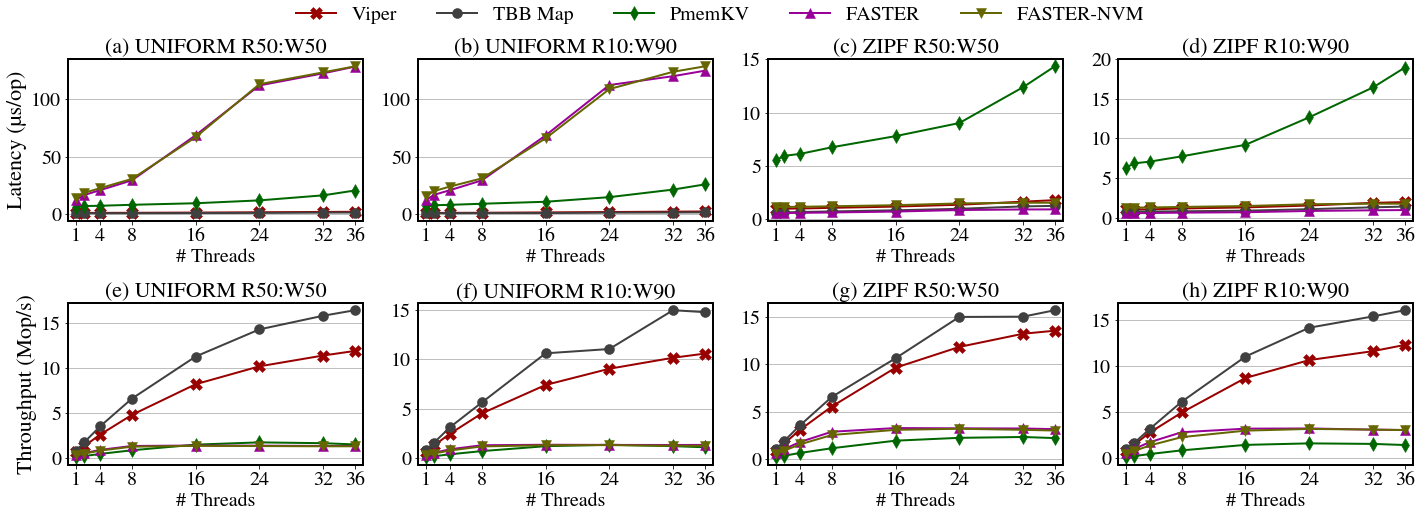

In [116]:
fig, (lat_axes, tp_axes) = plt.subplots(2, 4, figsize=(20, 7))
uniform_5050_ax, uniform_1090_ax, zipf_5050_ax, zipf_1090_ax = lat_axes
uniform_5050_ax_tp, uniform_1090_ax_tp, zipf_5050_ax_tp, zipf_1090_ax_tp = tp_axes

def get_bm_ax(bm_type):
    if bm_type == '5050_uniform': return (uniform_5050_ax, uniform_5050_ax_tp)
    if bm_type == '1090_uniform': return (uniform_1090_ax, uniform_1090_ax_tp)
    if bm_type == '5050_zipf': return (zipf_5050_ax, zipf_5050_ax_tp)
    if bm_type == '1090_zipf': return (zipf_1090_ax, zipf_1090_ax_tp)
    raise RuntimeError(f"Unknown bm_type {bm_type}")

num_threads = sorted({run['threads'] for run in list(RUNS.values())[0]})
SEC_IN_US = 1000000

for bm_type in BM_TYPES:
    (lt_ax, tp_ax) = get_bm_ax(bm_type)
    lt_ax.set_xlabel("# Threads", fontsize=20)
    tp_ax.set_xlabel("# Threads", fontsize=20)
    
    for (fixture, _) in FIXTURES:
        r = [run['items_per_second'] / MILLION for run in RUNS[(fixture, bm_type)]]
#         times = [(run['real_time'] * run['threads']) / run['found'] for run in RUNS[(fixture, bm_type)]]
#         times = [SEC_IN_US / (run['items_per_second'] / run['threads']) for run in RUNS[(fixture, bm_type)]]
        hdr_mean = [run['hdr_mean'] / 1000 for run in RUNS[(fixture, bm_type)]]
        hdr_9999 = [run['hdr_9999'] / 1000 for run in RUNS[(fixture, bm_type)]]
        style = STYLES[fixture]
        lt_ax.plot(num_threads, hdr_mean, marker=style.marker, ms=style.marker_size, 
                   color=style.color, markeredgewidth=0.5, lw=2)
        tp_ax.plot(num_threads, r, marker=style.marker, ms=style.marker_size, 
                   color=style.color, markeredgewidth=0.5, lw=2)
        
#         ax.plot(num_threads, times, marker=style.marker, ms=style.marker_size, 
#                 color=style.color, markeredgewidth=0.5, lw=2)
#         ax.plot(num_threads, r, marker=style.marker, ms=style.marker_size, 
#                 color=style.color, markeredgewidth=0.5, lw=2)
    for ax in [lt_ax, tp_ax]:
        ax.set_xticks([1, 4, 8, 16, 24, 32, 36])
        ax.set_xlim(0, 37)
        ax.grid(axis='y', which='major')
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(20)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(20)

#     lt_ax.set_yscale('log')
    

uniform_5050_ax.set_ylabel("Latency (µs/op)", fontsize=22)
uniform_5050_ax.set_title(f"(a) UNIFORM R50:W50", fontsize=22)
uniform_1090_ax.set_title(f"(b) UNIFORM R10:W90", fontsize=22)
zipf_5050_ax.set_title(f"(c) ZIPF R50:W50",    fontsize=22)
zipf_1090_ax.set_title(f"(d) ZIPF R10:W90", fontsize=22)

uniform_5050_ax_tp.set_ylabel("Throughput (Mop/s)", fontsize=22)
uniform_5050_ax_tp.set_title(f"(e) UNIFORM R50:W50", fontsize=22)
uniform_1090_ax_tp.set_title(f"(f) UNIFORM R10:W90", fontsize=22)
zipf_5050_ax_tp.set_title(f"(g) ZIPF R50:W50",    fontsize=22)
zipf_1090_ax_tp.set_title(f"(h) ZIPF R10:W90", fontsize=22)

fig.legend(loc='upper center', labels=[f[1] for f in FIXTURES], 
           bbox_to_anchor=(0.5, 1.05), ncol=6, frameon=False, fontsize=20)

zipf_1090_ax.set_yticks([0, 5, 10, 15, 20])

fig.savefig('charts/ycsb.pdf', bbox_inches='tight')
fig.savefig('charts/ycsb.svg', bbox_inches='tight')